In [1]:
import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf 
import matplotlib as mlt
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
sys.path.append("../src")  # adjust path as needed
from ml_model_cnn import data_generator
from ml_model_cnn import ml_models
from tensorflow.keras import models


### Load the data for ML model

In [2]:
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files/diffusion0.1/'

holdout = 10
nsteps = 3

data = data_generator(output_dir, holdout=holdout, nsteps = nsteps, dim=1, csv=1, x_res=100)
X_train_base, Y_train_base, X_test, Y_test = data.read_1d()


### Split the data and train the model

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_base[:,:,0:2], Y_train_base, test_size=0.2, 
                                                    shuffle=False)
model_instantiate = ml_models(nx = 100, dim=2)
my_model = model_instantiate.cnn_model_1d_multistep_diff(K=nsteps)

In [4]:
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l1 (Conv1D)                │ (None, 100, 9)         │            63 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l2 (Conv1D)                │ (None, 100, 9)         │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l3 (Conv1D)                │ (None, 100, 6)         │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ neural (TimeDistributed)        │ (None, 100, 136)       │           952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Conv1D)                 │ (None, 100, 3)         │           411 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846 (7.21 KB)

 Trainable params: 1,846 (7.21 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Set learning rate here
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
my_model.build(input_shape=(None, 100, 1))  # assuming nx = 100

my_model.compile(loss='mse', optimizer=optimizer)

In [6]:
history = my_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_validation, Y_validation))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - loss: 0.2363 - val_loss: 0.0762
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2107 - val_loss: 0.0583
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1825 - val_loss: 0.0415
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1466 - val_loss: 0.0270
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1177 - val_loss: 0.0174
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0886 - val_loss: 0.0155
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0599 - val_loss: 0.0239
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0441 - val_loss: 0.0429
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0317 - val_loss: 0.0660
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0292 - val_loss: 0.0784
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0278 - val_loss: 0.0738
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0244 - val_l

In [7]:
Y_train.shape

(71, 100, 3)

##### 🎨 Make the plots pretty 

In [8]:

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

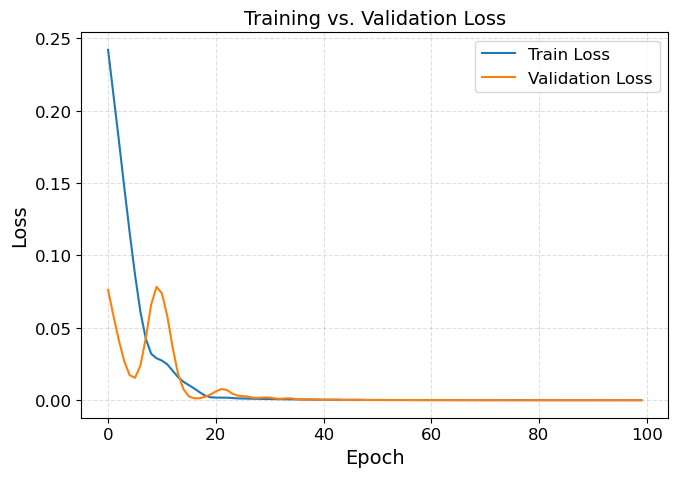

In [9]:

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

In [10]:
u_pred = my_model.predict(X_validation)
print(u_pred.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
(18, 100, 3)


#### This is the Validation set prediction

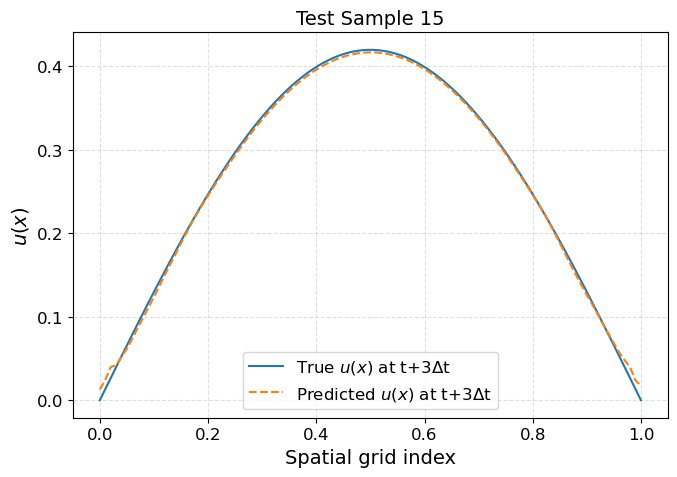

In [14]:

i = 15  # which test example to look at
# Y_validation_np = Y_validation.values[..., np.newaxis]

fig,ax = plt.subplots(1,1,figsize=(7,5))
plt.plot(X_train_base[0,:,2], Y_validation[i+2, :, 0], label='True $u(x)$ at t+3Δt')
plt.plot(X_train_base[0,:,2], u_pred[i, :, 2], '--', label='Predicted $u(x)$ at t+3Δt')

plt.legend()
plt.xlabel('Spatial grid index')
plt.ylabel('$u(x)$')
plt.title(f'Test Sample {i}')
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

### Predict the last snapshot, based on the last snapshot in the test set.

The train and test set contains the snapshots from 0 - t_final - holdout 

Predicting from X_test[0], which is from time index: 90
(10, 100, 3) (10, 100, 3)
0.8800122436486293


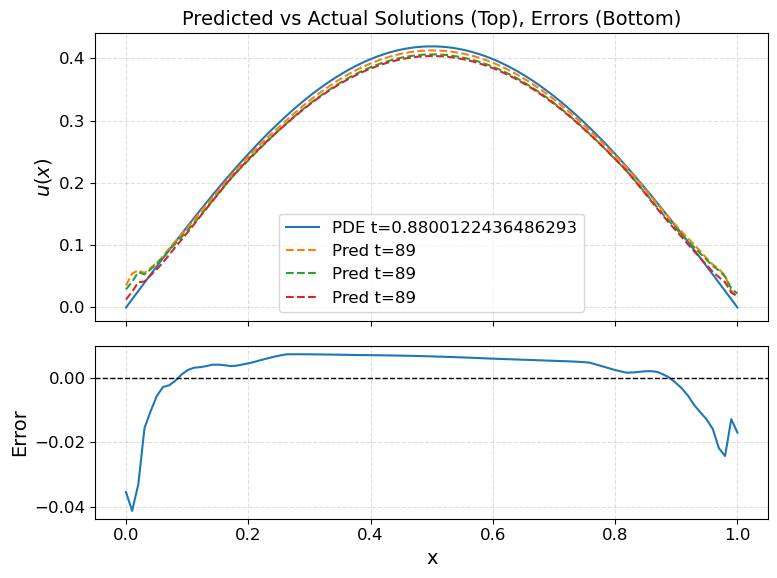

In [ ]:
x = np.linspace(0, 1, X_test.shape[1])

fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1.8]})

files = sorted([f for f in os.listdir('../data/csv_files/diffusion0.1/') if f.startswith('data_') and f.endswith('.csv')])


# Prediction
u_tn = X_test[:,:,0:2]
u_pred_new = my_model(u_tn, training=False).numpy()
print("Predicting from X_test[0], which is from time index:", len(files) - holdout - 1)
print(X_test.shape,u_pred_new.shape)
i = 0
print(X_test[0,0,1])
# True solution
pred_index = len(files) -1 - holdout + i  
filename = os.path.join('../data/csv_files/diffusion0.1/', f'data_{pred_index:04d}.csv')
data = pd.read_csv(filename)
var_u = data.filter(like='u_t').values.flatten()

# Plot true vs predicted
axs[0].plot(x, var_u, linewidth=1.5, label=f'PDE t={data['t'][0]}')
axs[0].plot(x, u_pred_new[i, :, 0], '--', linewidth=1.5, label=f'Pred t={pred_index}')
axs[0].plot(x, u_pred_new[i, :, 1], '--', linewidth=1.5, label=f'Pred t={pred_index}')
axs[0].plot(x, u_pred_new[i, :, 2], '--', linewidth=1.5, label=f'Pred t={pred_index}')

axs[0].legend()

# Plot error
error = var_u - u_pred_new[i, :, 0]
axs[1].plot(x, error, linewidth=1.5, label=f'Error t={pred_index}')

# Top: Predictions vs PDE
axs[0].set_ylabel('$u(x)$')
axs[0].set_title('Predicted vs Actual Solutions (Top), Errors (Bottom)')
#axs[0].legend(ncol=3)
axs[0].grid(True, linestyle='--', alpha=0.4)

# Bottom: Errors
axs[1].axhline(0, color='k', linestyle='--', linewidth=1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Error')
#axs[1].legend(ncol=4)
axs[1].grid(True, linestyle='--', alpha=0.4)

fig.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


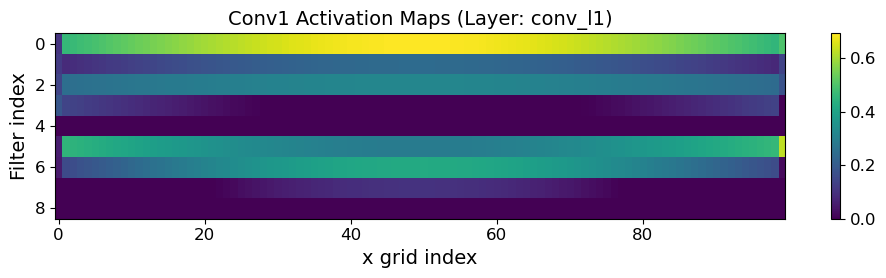

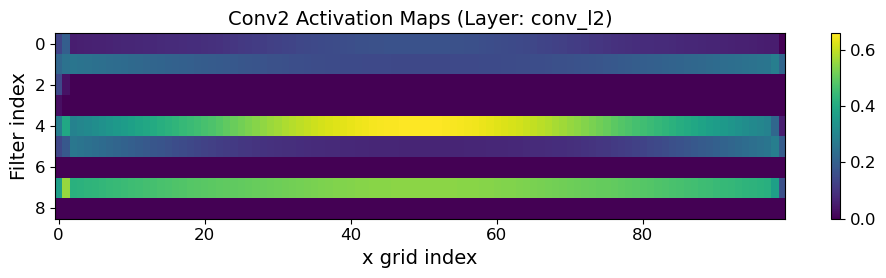

In [17]:
# Trigger model build if not done
dummy_input = X_test[:,:,0:2]
_ = my_model.predict(dummy_input)
# Get intermediate models
layer_out_l1 = models.Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l1').output)
layer_out_l2 = models.Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l2').output)

# Compute activations
activ_l1 = layer_out_l1.predict(X_test[:1, :, 0:2])
activ_l2 = layer_out_l2.predict(X_test[:1, :, 0:2])

# Plot conv_l1 activations
plt.figure(figsize=(10, 3))
plt.imshow(activ_l1[0].T, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Conv1 Activation Maps (Layer: conv_l1)")
plt.ylabel("Filter index")
plt.xlabel("x grid index")
plt.tight_layout()

# Plot conv_l2 activations
plt.figure(figsize=(10, 3))
plt.imshow(activ_l2[0].T, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Conv2 Activation Maps (Layer: conv_l2)")
plt.ylabel("Filter index")
plt.xlabel("x grid index")
plt.tight_layout()

plt.show()

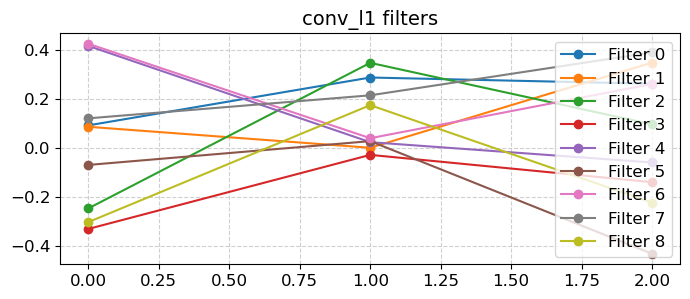

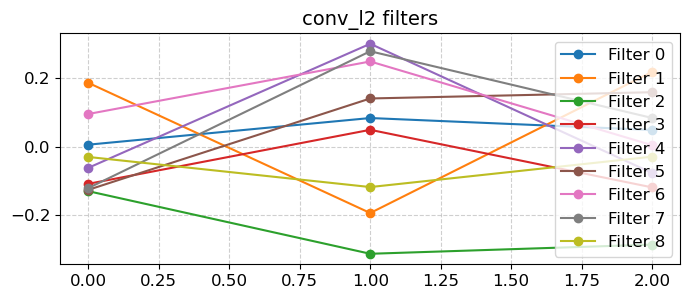

In [ ]:
def plot_filters(layer_name):
    weights = my_model.get_layer(layer_name).get_weights()[0]
    kernel_size, in_channels, out_channels = weights.shape

    plt.figure(figsize=(8, 3))
    for i in range(out_channels):
        plt.plot(weights[:, 0, i],'o-', label=f'Filter {i}')
    plt.title(f'{layer_name} filters')
    plt.grid(linestyle='--',alpha=0.6)
    plt.legend()
    plt.show()

# Filters from first conv layer
plot_filters('conv_l1')

# Filters from second conv layer
plot_filters('conv_l2')

In [20]:
# Get conv_l1 weights: shape (3, 1, 6)
weights = my_model.get_layer('conv_l1').get_weights()[0]
weights = weights[:, 0, :]  # shape: (3, 6)

# Normalize each filter for comparison (up to scale)
normalized_filters = weights / np.linalg.norm(weights, axis=0, keepdims=True)

# Define FD Laplacian filter
fd_laplacian = np.array([1.0, -2.0, 1.0])
fd_norm = fd_laplacian / np.linalg.norm(fd_laplacian)

# Compare using cosine similarity
for i in range(normalized_filters.shape[1]):
    cos_sim = np.dot(normalized_filters[:, i], fd_norm)
    print(f"Filter {i}: Cosine similarity to [1, -2, 1] for layer 1 = {cos_sim:.4f}")
    
weights = my_model.get_layer('conv_l2').get_weights()[0]
weights = weights[:, 0, :]  # shape: (3, 6)

# Normalize each filter for comparison (up to scale)
normalized_filters = weights / np.linalg.norm(weights, axis=0, keepdims=True)

# Define FD Laplacian filter
fd_laplacian = np.array([1.0, -2.0, 1.0])
fd_norm = fd_laplacian / np.linalg.norm(fd_laplacian)

# Compare using cosine similarity
for i in range(normalized_filters.shape[1]):
    cos_sim = np.dot(normalized_filters[:, i], fd_norm)
    print(f"Filter {i}: Cosine similarity to [1, -2, 1] for layer 2 = {cos_sim:.4f}")

Filter 0: Cosine similarity to [1, -2, 1] for layer 1 = -0.2248
Filter 1: Cosine similarity to [1, -2, 1] for layer 1 = 0.4916
Filter 2: Cosine similarity to [1, -2, 1] for layer 1 = -0.7895
Filter 3: Cosine similarity to [1, -2, 1] for layer 1 = -0.4706
Filter 4: Cosine similarity to [1, -2, 1] for layer 1 = 0.2999
Filter 5: Cosine similarity to [1, -2, 1] for layer 1 = -0.5195
Filter 6: Cosine similarity to [1, -2, 1] for layer 1 = 0.4937
Filter 7: Cosine similarity to [1, -2, 1] for layer 1 = 0.0717
Filter 8: Cosine similarity to [1, -2, 1] for layer 1 = -0.8631
Filter 0: Cosine similarity to [1, -2, 1] for layer 2 = -0.4696
Filter 1: Cosine similarity to [1, -2, 1] for layer 2 = 0.9329
Filter 2: Cosine similarity to [1, -2, 1] for layer 2 = 0.1934
Filter 3: Cosine similarity to [1, -2, 1] for layer 2 = -0.7936
Filter 4: Cosine similarity to [1, -2, 1] for layer 2 = -0.9536
Filter 5: Cosine similarity to [1, -2, 1] for layer 2 = -0.4101
Filter 6: Cosine similarity to [1, -2, 1] for 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


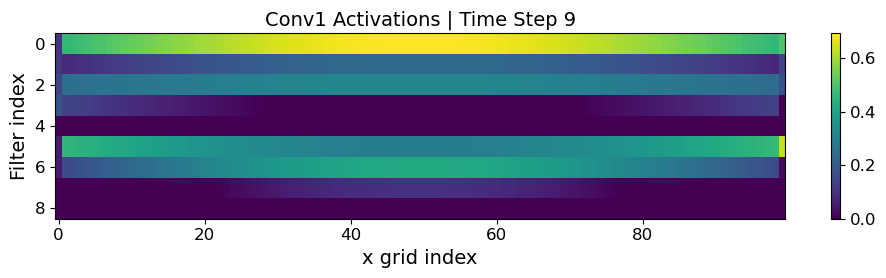

In [22]:
import matplotlib.animation as animation
from tensorflow.keras.models import Model
# Extract conv_l1 activation model
layer_model = Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l1').output)

# Generate activations for all time steps in X_test
activations_seq = layer_model.predict(X_test[:,:,0:2])  # shape: (T, nx, filters)

# Setup animation
fig, ax = plt.subplots(figsize=(10, 3))
img = ax.imshow(activations_seq[0].T, aspect='auto', cmap='viridis', vmin=0, vmax=activations_seq.max())
cbar = fig.colorbar(img)
ax.set_title("Conv1 Activations Over Time")
ax.set_ylabel("Filter index")
ax.set_xlabel("x grid index")

def update(frame):
    img.set_data(activations_seq[frame].T)
    ax.set_title(f"Conv1 Activations | Time Step {frame}")
    return [img]

ani = animation.FuncAnimation(fig, update, frames=len(activations_seq), interval=200, blit=True)
ani.save("activations.mp4")
plt.tight_layout()
plt.show()